### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [2]:
# Split data into training and test datasets
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [3]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

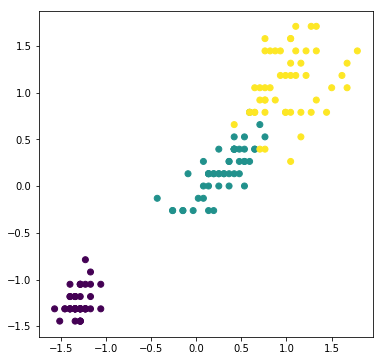

In [4]:
# Step 1.1 (optional): Visualize our data

# your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [5]:
# Step 2: Fit your data


class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 0.8430753994723293
Loss at iteration 500 0.16597652960792397
Loss at iteration 1000 0.12076368471496664
Loss at iteration 1500 0.10212230465079959
Loss at iteration 2000 0.09146121486936928
Loss at iteration 2500 0.08438339480364065
Loss at iteration 3000 0.0792683051040876
Loss at iteration 3500 0.0753645924571479
Loss at iteration 4000 0.07227031084922964
Loss at iteration 4500 0.06974825397628176
Loss at iteration 5000 0.06764806520337008
Loss at iteration 5500 0.0658691311302792
Loss at iteration 6000 0.064341210547344
Loss at iteration 6500 0.06301357252198996
Loss at iteration 7000 0.061848545691339886
Loss at iteration 7500 0.06081750243963498
Loss at iteration 8000 0.059898258707530364
Loss at iteration 8500 0.05907333358437982
Loss at iteration 9000 0.058328750881110177
Loss at iteration 9500 0.05765319346754768
time taken: 0.683826208114624
=========Classification report=======
Report:               precision    recall  f1-score   support

          0     

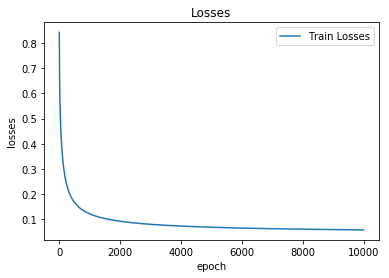

In [6]:
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.137130384631047
Loss at iteration 500 0.28972881066368705
Loss at iteration 1000 0.2665424935091376
Loss at iteration 1500 0.25098582191860147
Loss at iteration 2000 0.13656087790817237
Loss at iteration 2500 0.1367402112396181
Loss at iteration 3000 0.1532809721280135
Loss at iteration 3500 0.097406145512721
Loss at iteration 4000 0.18604774126591272
Loss at iteration 4500 0.1311137427809767
Loss at iteration 5000 0.38298506964731693
Loss at iteration 5500 0.14885185623730196
Loss at iteration 6000 0.07091852974796033
Loss at iteration 6500 0.07599345863226388
Loss at iteration 7000 0.07774523394918859
Loss at iteration 7500 0.07091819735970165
Loss at iteration 8000 0.22694967623673
Loss at iteration 8500 0.10748356536370486
Loss at iteration 9000 0.22283121821017468
Loss at iteration 9500 0.1263549979402131
time taken: 0.5657882690429688
=========Classification report=======
Report:               precision    recall  f1-score   support

          0       1.00  

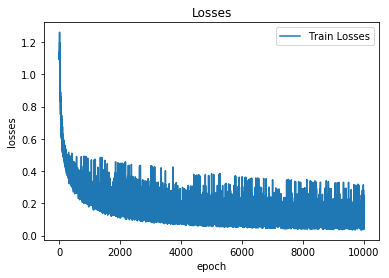

In [7]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 0.8118037427973392
Loss at iteration 500 0.6838153357879834
Loss at iteration 1000 0.9185256622371352
Loss at iteration 1500 0.9725036236451227
Loss at iteration 2000 0.2963731046307285
Loss at iteration 2500 0.7502842002797817
Loss at iteration 3000 0.23571717133166636
Loss at iteration 3500 0.2094354465157188
Loss at iteration 4000 0.8047349196883223
Loss at iteration 4500 0.5148792777135194
Loss at iteration 5000 0.820247362622897
Loss at iteration 5500 0.1913141611194831
Loss at iteration 6000 0.5950386597000965
Loss at iteration 6500 0.871436420491541
Loss at iteration 7000 0.6133815131247088
Loss at iteration 7500 0.613405311265342
Loss at iteration 8000 0.1061319911523521
Loss at iteration 8500 0.10258819293518175
Loss at iteration 9000 0.4852759595779598
Loss at iteration 9500 0.3393257393993336
time taken: 0.502110481262207
=========Classification report=======
Report:               precision    recall  f1-score   support

          0       1.00      1.00  

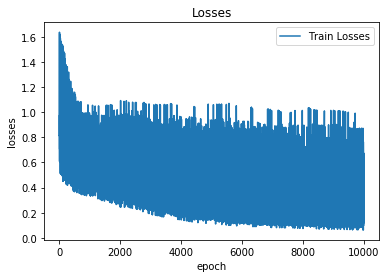

In [8]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [9]:
model = LogisticRegression(k, X_train.shape[1], "Chaky is so handsome")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".